In [10]:
## worked with tf2.5 environment, 
## but it is called tf2.5 with sklearn in the jupnotebook
import numpy as np

In [7]:
import sys
sys.executable

'C:\\Users\\salta\\anaconda3\\envs\\tf2.5\\python.exe'

In [8]:
import nibabel as nib

In [2]:
import glob

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
import matplotlib.pyplot as plt

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
TRAIN_DATASET_PATH = 'D:/THESIS/MICCAI_BraTS2020_TrainingData/'
test_image_flair = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_011/BraTS20_Training_011_flair.nii.gz')


In [16]:
test_image_flair = test_image_flair.get_fdata()

In [18]:
#test_image_flair

In [19]:
print(test_image_flair.max())

984.0


In [20]:
test_image_flair.shape

(240, 240, 155)

In [23]:
test_image_flair =scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [24]:
print(test_image_flair.max())

1.0


In [25]:
test_image_flair = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_011/BraTS20_Training_011_flair.nii.gz')
test_image_t1 = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_011/BraTS20_Training_011_t1.nii.gz')
test_image_t1ce = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_011/BraTS20_Training_011_t1ce.nii.gz')
test_image_t2 = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_011/BraTS20_Training_011_t2.nii.gz')
test_mask = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_011/BraTS20_Training_011_seg.nii.gz')

In [27]:
#test_image_flair = test_image_flair.get_fdata()
test_image_t1 = test_image_t1.get_fdata()
test_image_t1ce = test_image_t1ce.get_fdata()
test_image_t2 = test_image_t2.get_fdata()
test_mask = test_mask.get_fdata()

In [28]:
#test_image_flair =scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
test_image_t1 =scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
test_image_t1ce =scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)
test_image_t2 =scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
test_mask  = test_mask.astype(np.uint8)

In [29]:
print(np.unique(test_mask))

[0 1 2 4]


In [30]:
test_mask [test_mask==4] =3
print(np.unique(test_mask))

[0 1 2 3]


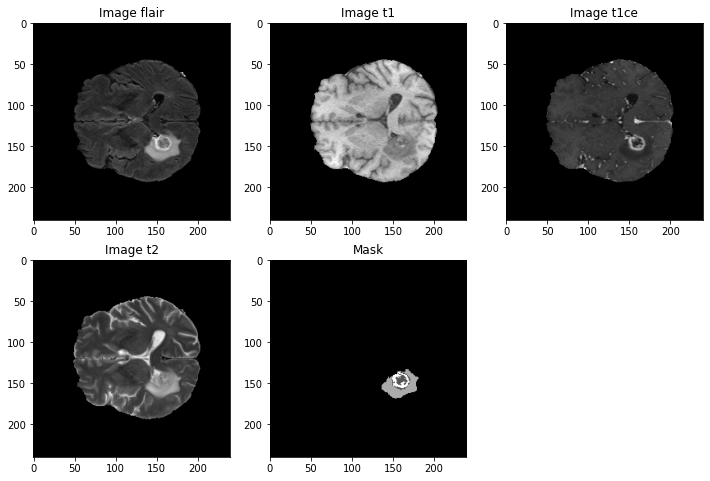

In [35]:
import random 
n_slice  = random.randint(0, test_mask.shape[2])
plt.figure(figsize = (12,8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap = 'gray')
plt.title('Image flair')

plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap = 'gray')
plt.title('Image t1')

plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap = 'gray')
plt.title('Image t1ce')

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap = 'gray')
plt.title('Image t2')

plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice], cmap = 'gray')
plt.title('Mask')
plt.show()


In [ ]:
# According to video of Dr. Sreenivas Bhattiprolu
#Flair, T1CE, annd T2 have the most information
#Combine t1ce, t2, and flair into single multichannel image

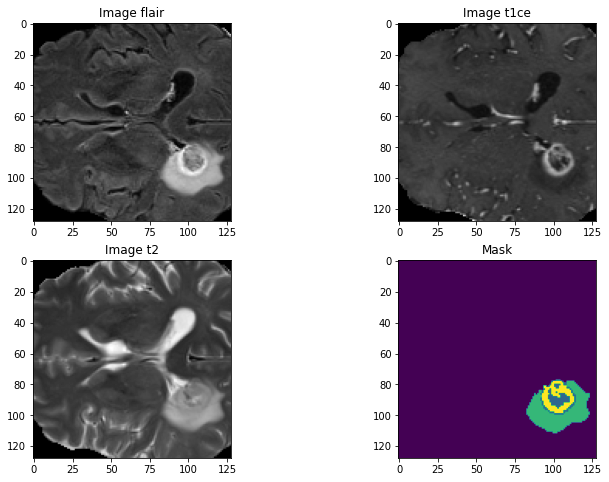

In [36]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

#Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
#cropping x, y, and z
#combined_x=combined_x[24:216, 24:216, 13:141]

combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4

#Do the same for mask
test_mask = test_mask[56:184, 56:184, 13:141]

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()



In [37]:
#imsave('BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('D:/THESIS/combined011_training.npy', combined_x)
#Verify image is being read properly
#my_img=imread('BraTS2020_TrainingData/combined255.tif')

my_img=np.load('D:/THESIS/combined011_training.npy')

test_mask = to_categorical(test_mask, num_classes=4)

In [52]:
t2_list = sorted(glob.glob('D:/THESIS/MICCAI_BraTS2020_ValidationData/*/*t2.nii.gz'))
t1ce_list = sorted(glob.glob('D:/THESIS/MICCAI_BraTS2020_ValidationData/*/*t1ce.nii.gz'))
flair_list = sorted(glob.glob('D:/THESIS/MICCAI_BraTS2020_ValidationData/*/*flair.nii.gz'))
#mask_list = sorted(glob.glob('D:/THESIS/MICCAI_BraTS2020_ValidationData/*/*seg.nii.gz'))


In [53]:
#mask_list

In [54]:
t2_list[:3]

['D:/THESIS/MICCAI_BraTS2020_ValidationData\\BraTS20_Validation_001\\BraTS20_Validation_001_t2.nii.gz',
 'D:/THESIS/MICCAI_BraTS2020_ValidationData\\BraTS20_Validation_002\\BraTS20_Validation_002_t2.nii.gz',
 'D:/THESIS/MICCAI_BraTS2020_ValidationData\\BraTS20_Validation_003\\BraTS20_Validation_003_t2.nii.gz']

In [51]:
#temp_mask=nib.load(mask_list[1]).get_fdata()
#temp_mask=temp_mask.astype(np.uint8)

In [55]:
for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    #temp_mask=nib.load(mask_list[img]).get_fdata()
    #temp_mask=temp_mask.astype(np.uint8)
    #temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))
    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    #temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    #val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        #temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('D:/THESIS/input_test_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        #np.save('D:/THESIS/input_test_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")   

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
Save Me
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me
Now prepar